# **Examination and Implementation of the Huffman Algorithm for Compressing Data**

**Author:** Rosen Milev

**Date:** 08.09.2023
***

## Table of contents

1. Introduction
1. Difference between Lossless and Lossy compression
2. When can we get away with Lossy compression?
3. Entropy
4. Construction of Huffman Trees
5. Examples
6. Decompression from Huffman Trees
7. Storage of Huffman Trees
8. Algorithm implementation in Python
9. Testing the Algorithm
***

### 1.Introduction

**Huffman Coding** is a **greedy technique** to obtain an optimal solution to a problem. The **Huffman coding** is generally used for **lossless** data compression mechanisms. Sometimes, it is also called data compression encoding. It makes sure that there is no ambiguity while decoding the output bitstream.

**Greedy algorithms** use a heuristic approach to make an **optimal choice** at each stage while problem-solving to find a globally optimized solution.  The greedy approach allows us to solve a problem and find an optimal solution using the optimal substructure. An optimal substructure to a problem is achieved if an optimal solution can be created from the optimal solutions of its subproblems.

The Huffman coding uses a **prefix rule** that avoids ambiguity while decoding. The two steps involved in Huffman coding are:

- Construct a Huffman tree from the input string or text or characters.
- Assigning a Huffman code to each character by traversing the tree.

**The Huffman coding algorithm** follows a greedy design approach, utilizing a Huffman tree for efficient data encoding and decoding.

In this project we will examine and implement The Huffman algorithm for compressing data by understanding what is the difference between lossless and lossy compression and when to use them. Then exploring the concept of entropy, how Huffman Trees are constructed and how to decompress and store them will provide us with additional clarity and a deeper understanding of how the algorithm works. Finally we will test its performance compared to other algorithms.
***


### 2.Difference between Lossless and Lossy compression

Data Compression is a technique in which the size of data is reduced without loss of information. Lossy compression and Lossless compression are the categories of data compression method.

The main difference between the two compression techniques (lossy compression and Lossless compression) is that, The lossy compression technique does not restored the data in its original form, after decompression on the other hand lossless compression restores and rebuilt the data in its original form, after decompression.

Difference between Lossy Compression and Lossless Compression:

| S.NO |    Lossy Compression    |    Lossless Compression    |
|:----:|:----------------------:|:-------------------------:|
|  1.  | Lossy compression is the method which eliminates non-noticeable data. | Lossless Compression does not eliminate non-noticeable data. |
|  2.  | A file cannot be restored in its original form in Lossy compression.   | A file can be restored in its original form in Lossless Compression. |
|  3.  | Lossy compression compromises the data's quality.                      | Lossless Compression does not compromise the data's quality.      |
|  4.  | Lossy compression reduces the size of data.                            | Lossless Compression does not reduce the size of data.            |
|  5.  | Algorithms used in Lossy compression: Transform coding, Discrete Cosine Transform, Discrete Wavelet Transform, fractal compression, etc. | Algorithms used in Lossless compression: Run Length Encoding, Lempel-Ziv-Welch, Huffman Coding, Arithmetic encoding, etc. |
|  6.  | Lossy compression is used in Images, audio, video.                      | Lossless Compression is used in Text, images, sound.              |
|  7.  | Lossy compression has higher data-holding capacity.                     | Lossless Compression has lower data-holding capacity than Lossy compression technique. |
|  8.  | Lossy compression is also termed as irreversible compression.           | Lossless Compression is also termed as reversible compression.     |

***

### 3.When can we get away with Lossy compression?

Lossy compression algorithms are techniques that reduce file size by discarding the less important information.

Nobody likes losing information, but some types of files are so large that there's just not enough space to keep all the original data, plus we didn't need all that data in the first place. That's often the case with photos, videos, and audio recordings; files that try to capture the beautiful complexity of the world we live in.

Computers can capture an incredible amount of detail in a photo—but how much of that detail can humans actually perceive? As it turns out, there's a lot of detail that we can remove. Lossy compression algorithms are all about figuring out clever ways to remove detail without humans noticing (too much).

- **Images**: Keep the brightness, average the color

The human eye is better at perceiving differences in brightness than differences in color. A compression algorithm can take advantage of that fact by keeping the brightness while reducing the amount of color information, a process known as chroma subsampling.

- **Audio**: Drop the inaudible sounds

The human ear has limitations to what it can hear. Audio compression algorithms can analyze an audio file and discard the sounds that are outside our hearing capacity, a process known as perceptual audio coding.
One interesting limitation of our ears is known as temporal masking. That's when a sudden sound can mask (hide) other sounds for a period after it occurs—and even a bit before!

- **Video**: Distortion

*Perceptual distortion*

Perceptual distortion is a famous metric that has been used historically for assessing video quality. Distortion theory provides the framework to study the trade-offs between the data rate and the Distortion itself. 

*Mean Square Error*

Another measure of distortion is mean square error, where is X the input data sequence, Y is output data sequence and N is the count of elements:$$MSE= \frac{1}{N} \sum_{n=1}^{N} (x_n - y_n)^2$$
***


### 4.Entropy

Claude Shannon is considered the pioneer of information theory. Through his work and
the work of others, three of the premier compression algorithms in use today were devised.

In general, entropy can be viewed as the limits to do useful work imposed on a system.
Shannon extends this concept to represent the amount of uncertainty that remains in a
information system as summarized in the equation below. We must analyze the general form of
the entropy equation in order to understand the relationship between the concepts.
$$S = -k\sum_{i=1}^{n} P_i \log P_i$$
where S is entropy, A: is a constant of proportionality and Pv the / the known item's probability. 


Entropy in terms of the space,the items contained within the space and the work to be accomplished. The space in data
compression corresponds to the resource available. The space in information systems is
usually defined in binary and the space available is the bit space. The bit space is usually
visualized using a binary tree to describe the possible paths from the root of the tree to
the leaves. The paths from the root to a leaves represent the code words required to reach
symbols stored in the tree. The combination of all the leaves represents the symbol space
as all the symbols must be contained there to maintain the prefix-free property. In information theory and data compression the symbols represent the information contained within
the space. The distance between the symbols and a known reference point represents the
uncertainty or the entropy within the system. In order to quantify a relationship between
these items, it is necessary to put the two terms in proportion. This term k is exhibited in the equation above.

In general we defined entropy as the limits on the system to do useful
work. In data compression and information theory the work involved is the transfer or storage of information via a code word to an information relationship. This relationship is the
fundamental building block of both processes. The success of a process is represented by
the certainty that the symbol resolves uniquely to the information.
Shannon defines the measure for information entropy adhering to Property I
in terms of H. Since then the symbol H has become the customary representation to define
information entropy, also referred to as "Shannon Entropy". This is in contrast to S for
general entropy given previously. By substitution, where k = l/log(2) and S is exchanged
for H, the equation for information theory becomes:
$$H = -\sum_{i=1}^{n} P_i \log_2 P_i$$

Now that we have an equation to represent Shannon's view of entropy, we look at the
terms again more closely in binary. According to Shannon, information entropy represents
the average uncertainty or lack of information contained in the encoded message. So if we
follow the framework provided by the spatial meaning of entropy we are looking for two
things. The first is the space being utilized by the system and in the case of binary it is
the bit space. This space is represented by a series of O's or l's (bits) with some limitation
put on the length or number of the bit values representing the complete space. The second
thing we are looking for is the items of known probability and we refer to them as symbols.
These symbols can represent anything from a character to a piece of an image. By this
simple exchange it is easy to see that the entropy equation relates to the transmission and
storage of data in a computer. The space is represented by the binary values possible and
the symbols represent the data to be encoded or stored. 





### Huffman and entropy

Huffman encoding does not have a
complete view of the tree until the algorithm is complete. Huffman's encoding model
is local to only individual symbols or sub-trees represented by the value of the symbols
contained in the sub-tree. In order to analyze Huffman encoding in terms of entropy we
must reduce the H equation to consist of only two terms.

Since the algorithm is always grouping the symbols in groups of two, it is essentially
reducing n values to 2 when calculating the P,- for a given symbol. This reduces the problem
to a P and 1 — P problem as used by Shannon. The graph of the concept is replicated in the following figure.


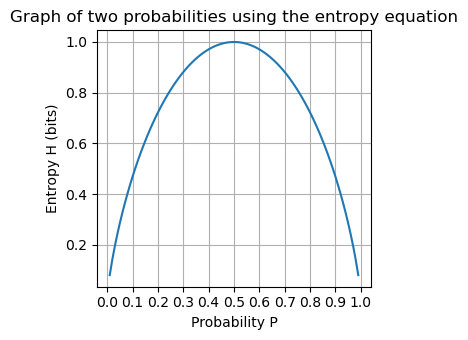

In [42]:
import matplotlib.pyplot as plt
import numpy as np


probabilities = np.arange(0.01, 1, 0.01)
entropy = -(probabilities * np.log2(probabilities) + (1 - probabilities) * np.log2(1 - probabilities))
plt.plot(probabilities, entropy, linestyle='-')
plt.xlabel('Probability P')
plt.ylabel('Entropy H (bits)')
plt.title('Graph of two probabilities using the entropy equation')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.grid(True)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.show()

The figure displays the H in bits, where $H = -(Plog_2(P) + (1 - P)log_2(l -P))$. As
Shannon explains the most uncertain situation occurs when the P,s are all equal and this
condition exists when each symbol has the maximum distance from the root node or certainty. In the graph this condition is represented at the top of the curve where $H$ is equal
to one. At this point both $P$ and $1 — P$ have a certainty of 50% and an uncertainty of
50%. The combined uncertainty is 1.00 or 100%. To minimize uncertainty one of the two
probabilities must approach 100% and $H$ approaches zero. 

The graph of two probabilities applies to Huffman encoding since it is only dealing
with two symbol counts. The algorithm ensures that the $Pi$ values in the theoretical ideal
are minimum by selecting the two minimum counts. The $P(log_2(l/P()$ returns the maximum values of all possible values of the $H$ equation. Since each of the values is a local
maximum it ensures that the entropy equation for the two is the maximum as displayed in
the graph. This is important because the algorithm is building the tree bottom up and optimal compression requires that the symbols with the most entropy be located at the bottom
of the tree. The algorithm does not apply any of this because the $log_2()$ function is used to
calculate the number of expansions required to fit the values in the entropy equation, i.e.,
the length. Since we are only dealing with two values, the length is one, so the calculation
is not needed. 

The only thing left to simplify in $H$ for two values is the probabilities which represents
symbol count $Sc$ divided by the total symbol count $TSc$, i.e., $Sc/TSc$ where $TSc$ is the
sum of the two symbol counts. Since the algorithm is only dealing with two values the
probabilities can be reduced to only the symbol counts for the algorithm. If we look at this
step mathematically, the total symbol count in the probabilities would simply cancel in a
comparison between two values to reveal the counts themselves. For example, $2/3 <> 1/3$
in a comparison is equivalent to $2 <> 1$ as far as the outcome is concerned.
This simplifies the equation to a comparison between two values as described by the
Huffman algorithm. Since the algorithm is selecting the minimum valued symbols, it is
selecting the symbols representing the greatest entropy. The selection of the two minimum
values also means that the values are as close to equal as possible, and the selection ensures
that the width is also the minimum for each combination. By selecting them in pairs the
algorithm is balancing the relationship between $P$ and $P — 1$. Therefore, the selection of the minimums at each step ensures both the length and the width of the resulting subtree is minimal. The combination of the choices results in the complete
algorithm.

The algorithm is actually selecting the maximum entropy values
at each decision and building a tree that models the entropy equation precisely. The greedy
selection of the maximum entropy values ensures that the final codes are optimal. 
***


### 5.Construction of Huffman Trees

The Huffman algorithm begins with symbols sorted based on their relative counts. The
algorithm chooses the two minimum count symbols from the list and combines them under
a single node represented by the combined count. This combined count is subsequently
placed back in the proper place to maintain the sorted list. The next step repeats by combining the next two minimum counts which can either represent individual symbols or
combined groups of symbols in a sub-tree. There is no regard to which is chosen, just
that the minimum values are combined at each step. The constant choice of the minimums
adheres to the greedy principle by always making the best choice at the time of decision.
The combination of the symbols or the sub-trees eventually reaches the point where all
symbols are represented under a common tree and completes the encoding sequence. The
route from the root to the leaves represents the code word for each symbol. The sort as
specified at the beginning of this explanation is not a requirement, it is utilized to diminish
the overall complexity of the algorithm in both explanation and implementation. The addition of a sorted list and priority queues enhances the runtime of the algorithm to 0(n) with
n number of symbols. The pseudo code is listed below:
1. Find the two symbols with the lowest count from the list of symbols. The list can be
sorted or unsorted.
2. Combine the sums and reference both symbols under a common node.
3. Place the common node back in the list.
4. Repeat steps 1 thru 3 until all symbols are represented in tree. No symbols are orphaned.
5. The paths from the root to the leaf nodes represents the code words. 
***

### 6.Examples

Suppose the string below is to be sent over a network.
    ![Initial string](resources/hf-string.jpg)
    <p style="text-align: center;font-weight: bold">Initial string</p>

Each character occupies 8 bits. There are a total of 15 characters in the above string. Thus, a total of $8 * 15 = 120 bits$ are required to send this string.

Using the Huffman Coding technique, we can compress the string to a smaller size.

Huffman coding first creates a tree using the frequencies of the character and then generates code for each character.

Once the data is encoded, it has to be decoded. Decoding is done using the same tree.

Huffman Coding prevents any ambiguity in the decoding process using the concept of prefix code ie. a code associated with a character should not be present in the prefix of any other code. The tree created above helps in maintaining the property.

Huffman coding is done with the help of the following steps.

1.Calculate the frequency of each character in the string.
    ![Frequency of string](resources/Initial-string.jpg)
    <p style="text-align: center;font-weight: bold">Frequency of string</p>

2.Sort the characters in increasing order of the frequency. These are stored in a priority queue $Q$.
    ![Frequency of string](resources/Characters-sorted-according-to-the-frequency.jpg)
    <p style="text-align: center;font-weight: bold">Characters-sorted-according-to-the-frequency</p>

3.Make each unique character as a leaf node.

4.Create an empty node $z$. Assign the minimum frequency to the left child of $z$ and assign the second minimum frequency to the right child of $z$. Set the value of the $z$ as the sum of the above two minimum frequencies.
    ![Frequency of string](resources/Getting-the-sum-of-the-least-numbers_1.jpg)
    <p style="text-align: center;font-weight: bold">Getting the sum of the least numbers</p>

5.Remove these two minimum frequencies from $Q$ and add the sum into the list of frequencies (* denote the internal nodes in the figure above).

6.Insert node $z$ into the tree.

7.Repeat steps 3 to 5 for all the characters.

8.For each non-leaf node, assign 0 to the left edge and 1 to the right edge.
    ![Frequency of string](resources/Assign-0-to-the-left-edge-and-1-to-the-right-edge.jpg)
    <p style="text-align: center;font-weight: bold">Assign 0 to the left edge and 1 to the right edge</p>


For sending the above string over a network, we have to send the tree as well as the above compressed-code. The total size is given by the table below.

| Character | Frequency | Code | Size       |
|-----------|-----------|------|------------|
| A         | 5         | 11   | 5 * 2 = 10 |
| B         | 1         | 100  | 1 * 3 = 3  |
| C         | 6         | 0    | 6 * 1 = 6  |
| D         | 3         | 101  | 3 * 3 = 9  |
| 4 * 8 = 32 bits | 15 bits |      | 28 bits    |

Without encoding, the total size of the string was $120 bits$. After encoding the size is reduced to $32 + 15 + 28 = 75 bits$.


### 7. Decompression from Huffman Trees

Decompressing the Compressed File:
1. The compressed file is opened, and the number of unique characters and the total number of characters in the file are retrieved.
2. The characters and their binary codes are then read from the file. We can recreate the Huffman tree using this.
3. For each binary code: 
- A left edge is created for 0, and a right edge is created for 1. 
- Finally, a leaf node is formed and the character is stored within it.
- This is repeated for all characters and binary codes. The Huffman tree is thus recreated in this manner.
4. The remaining file is now read bit by bit, and the corresponding 0/1 bit in the tree is traversed. The corresponding character is written into the decompressed file as soon as a leaf node is encountered in the tree.
5. Step 4 is repeated until the compressed file has been read completely. 
In this manner, we recover all of the characters from our input file into a newly decompressed file with no data or quality loss.

Following the steps above, we can compress a text file and then overcome the bigger task of decompressing the file to its original content without any data loss.

Time Complexity: $O(N * logN)$ where $N$ is the number of unique characters as an efficient priority queue data structure takes $O(logN)$ time per insertion, a complete binary tree with $N$ leaves has $(2*N – 1)$ nodes.
***


### 8. Storage of Huffman Trees

Storage of Huffman trees is an important aspect when we use Huffman coding. Huffman trees are binary by nature and represent hierarchical structure, which works by encoding symbols based on their frequencies.
There is various data structures that can be used to store a Huffman tree, depending on requirements and constraints of the application.Here is some common used approaches:
1. Array Representation- when we use this approach, the Huffman tree is stored as an array, in wich every element is a representation of a node in the tree. The array can be both linear or two-dimentional, depending on what is the structure of the tree. This approach is simple and memory-efficient, but additional metadata could be reqired to reconstruct the tree.

2. Linked List Represntation- here we use linked list nodes where each node contains information about its value, frequency and pointers either to its left or right child nodes. This approach is not so memory-efficient die to the overhead of linked list nodes, but it allows dynamic tree construction and ca be traversed easily.

3. Bit-Level Storage- another way to store the Huffman tree is to use compact, bit-level format. This approach is used mainly when space efficiency is crucial. The tree is encoded by using sequence of bits. Specific set of rules are followed to traverse and reconstruct the tree. ZIP and GZIP formats are using bit-level storage.

To decide how to store Huffman trees, its necessary to consider trade-off between ease of manipulation and space efficiency. Additionally, its worth nothing that some cases may not require to store the tree itself explicitly. The encoding scheme and frequencies are stored instead, which allows the tree to be reconstructed during encoding. This way is storage efficient but requires additional computional overhead during encoding and decoding processes.
***

### 9.Algorithm implementation in Python

```Python
# A Huffman Tree Node
class Node:
    def __init__(self, prob, symbol, left=None, right=None):
        # probability of symbol
        self.prob = prob

        # symbol 
        self.symbol = symbol

        # left node
        self.left = left

        # right node
        self.right = right

        # tree direction (0/1)
        self.code = ''

""" A helper function to print the codes of symbols by traveling Huffman Tree"""
codes = dict()

def Calculate_Codes(node, val=''):
    # huffman code for current node
    newVal = val + str(node.code)

    if(node.left):
        Calculate_Codes(node.left, newVal)
    if(node.right):
        Calculate_Codes(node.right, newVal)

    if(not node.left and not node.right):
        codes[node.symbol] = newVal
         
    return codes        

""" A helper function to calculate the probabilities of symbols in given data"""
def Calculate_Probability(data):
    symbols = dict()
    for element in data:
        if symbols.get(element) == None:
            symbols[element] = 1
        else: 
            symbols[element] += 1     
    return symbols

""" A helper function to obtain the encoded output"""
def Output_Encoded(data, coding):
    encoding_output = []
    for c in data:
      #  print(coding[c], end = '')
        encoding_output.append(coding[c])
        
    string = ''.join([str(item) for item in encoding_output])    
    return string
        
""" A helper function to calculate the space difference between compressed and non compressed data"""    
def Total_Gain(data, coding):
    before_compression = len(data) * 8 # total bit space to stor the data before compression
    after_compression = 0
    symbols = coding.keys()
    for symbol in symbols:
        count = data.count(symbol)
        after_compression += count * len(coding[symbol]) #calculate how many bit is required for that symbol in total
    print("Space usage before compression (in bits):", before_compression)    
    print("Space usage after compression (in bits):",  after_compression)           

def Huffman_Encoding(data):
    symbol_with_probs = Calculate_Probability(data)
    symbols = symbol_with_probs.keys()
    probabilities = symbol_with_probs.values()
    print("symbols: ", symbols)
    print("probabilities: ", probabilities)
    
    nodes = []
    
    # converting symbols and probabilities into huffman tree nodes
    for symbol in symbols:
        nodes.append(Node(symbol_with_probs.get(symbol), symbol))
    
    while len(nodes) > 1:
        # sort all the nodes in ascending order based on their probability
        nodes = sorted(nodes, key=lambda x: x.prob)
        # for node in nodes:  
        #      print(node.symbol, node.prob)
    
        # pick 2 smallest nodes
        right = nodes[0]
        left = nodes[1]
    
        left.code = 0
        right.code = 1
    
        # combine the 2 smallest nodes to create new node
        newNode = Node(left.prob+right.prob, left.symbol+right.symbol, left, right)
    
        nodes.remove(left)
        nodes.remove(right)
        nodes.append(newNode)
            
    huffman_encoding = Calculate_Codes(nodes[0])
    print("symbols with codes", huffman_encoding)
    Total_Gain(data, huffman_encoding)
    encoded_output = Output_Encoded(data,huffman_encoding)
    return encoded_output, nodes[0]  

def Huffman_Decoding(encoded_data, huffman_tree):
    tree_head = huffman_tree
    decoded_output = []
    for x in encoded_data:
        if x == '1':
            huffman_tree = huffman_tree.right   
        elif x == '0':
            huffman_tree = huffman_tree.left
        try:
            if huffman_tree.left.symbol == None and huffman_tree.right.symbol == None:
                pass
        except AttributeError:
            decoded_output.append(huffman_tree.symbol)
            huffman_tree = tree_head
        
    string = ''.join([str(item) for item in decoded_output])
    return string

```
***


### 10.Testing the algorithm

*Test with string*

In [63]:
data = "Huffman Coding is a greedy technique to obtain an optimal solution to a problem."
print(data)
print(40*'*')
encoding, tree = Huffman_Encoding(data)
print(40*'*')
print("Encoded output:", encoding)
print(40*'*')
print("Decoded Output:", Huffman_Decoding(encoding,tree))



Huffman Coding is a greedy technique to obtain an optimal solution to a problem.
****************************************
symbols:  dict_keys(['H', 'u', 'f', 'm', 'a', 'n', ' ', 'C', 'o', 'd', 'i', 'g', 's', 'r', 'e', 'y', 't', 'c', 'h', 'q', 'b', 'p', 'l', '.'])
probabilities:  dict_values([1, 3, 2, 3, 6, 6, 13, 1, 8, 2, 6, 2, 2, 2, 5, 1, 6, 1, 1, 1, 2, 2, 3, 1])
symbols with codes {' ': '000', 'l': '00100', 'm': '00101', 't': '0011', 'i': '0100', 'n': '0101', 'a': '0110', 'u': '01110', 'q': '011110', 'h': '011111', 'e': '1000', 'c': '100100', 'y': '100101', 'C': '100110', 'H': '100111', 'p': '10100', 'b': '10101', 'r': '10110', 's': '10111', 'o': '110', 'g': '11100', 'd': '11101', 'f': '11110', '.': '11111', 'k': '001110000', '-': '0011100010', 'z': '0011100100', 'E': '0011100101', 'I': '001110011', 'w': '1001000', 'x': '100100100', ',': '100100101', 'v': '1001010', 'T': '1001011'}
Space usage before compression (in bits): 640
Space usage after compression (in bits): 335
************

*Test with text file*

In [62]:
f = open("resources/textfile.txt", "r")

data = f.read()
print(data)
print(40*'*')
encoding, tree = Huffman_Encoding(data)
print(40*'*')
print("Encoded output:", encoding)
print(40*'*')
print("Decoded Output:", Huffman_Decoding(encoding,tree))

Entropy in terms of the space,the items contained within the space and the work to be accomplished. The space in data compression corresponds to the resource available. The space in information systems is usually defined in binary and the space available is the bit space. The bit space is usually visualized using a binary tree to describe the possible paths from the root of the tree to the leaves. The paths from the root to a leaves represent the code words required to reach symbols stored in the tree. The combination of all the leaves represents the symbol space as all the symbols must be contained there to maintain the prefix-free property. In information theory and data compression the symbols represent the information contained within the space. The distance between the symbols and a known reference point represents the uncertainty or the entropy within the system. In order to quantify a relationship between these items, it is necessary to put the two terms in proportion. This term

### *Sources:*

https://freecontent.manning.com/data-compression-with-huffmans-algorithm/

https://byjusexamprep.com/huffman-coding-i

https://www.geeksforgeeks.org/difference-between-lossy-compression-and-lossless-compression/

https://www.khanacademy.org/computing/computers-and-internet/xcae6f4a7ff015e7d:digital-information/xcae6f4a7ff015e7d:data-compression/a/lossy-compression

https://aquila.usm.edu/cgi/viewcontent.cgi?article=2112&context=dissertations

https://github.com/YCAyca/Data-Structures-and-Algorithms-with-Python/blob/main/Huffman_Encoding/huffman.py

https://www.programiz.com/dsa/huffman-coding

https://bitmovin.com/lossy-compression-algorithms/
